In [0]:
import pandas as pd

In [188]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
exchange = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/EXCHANGE.csv',encoding='cp949')

In [190]:
exchange.head()

,날짜,USD,EUR,CNY,JPY,GBP
0,2001-01-02,1259.7,1185.38,152.19,1099.07,1885.02
1,2001-01-03,1267.8,1205.49,153.15,1108.07,1903.35
2,2001-01-04,1285.4,1193.24,155.29,1128.53,1914.15
3,2001-01-05,1249.3,1190.90,150.92,1078.01,1876.82
4,2001-01-08,1267.8,1215.06,153.16,1088.71,1906.33


In [191]:
for i in range(len(exchange)):
  exchange['날짜'][i]=exchange['날짜'][i][:4]

exchange.head() #날짜 연도만 cut

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,날짜,USD,EUR,CNY,JPY,GBP
0,2001,1259.7,1185.38,152.19,1099.07,1885.02
1,2001,1267.8,1205.49,153.15,1108.07,1903.35
2,2001,1285.4,1193.24,155.29,1128.53,1914.15
3,2001,1249.3,1190.90,150.92,1078.01,1876.82
4,2001,1267.8,1215.06,153.16,1088.71,1906.33


## 결측치 처리

In [192]:
print(exchange.dtypes)
#exchange['날짜'].astype('float') 안바뀜
exchange['날짜']=pd.to_numeric(exchange['날짜'])
print('----------------변경후------------------')
print(exchange.dtypes)

날짜      object
USD    float64
EUR    float64
CNY    float64
JPY    float64
GBP    float64
dtype: object
----------------변경후------------------
날짜       int64
USD    float64
EUR    float64
CNY    float64
JPY    float64
GBP    float64
dtype: object


In [193]:
exchange.isnull().sum()

날짜        0
USD       0
EUR     220
CNY    1193
JPY      72
GBP    1012
dtype: int64

In [194]:
for i in range(0,18):
  exchange[exchange['날짜']==2001+i]=exchange[exchange['날짜']==2001+i].fillna(exchange[exchange['날짜']==2001+i].mean())

exchange.isnull().sum() 

날짜        0
USD       0
EUR       0
CNY    1000
JPY       0
GBP     248
dtype: int64

In [0]:
exchange_mean= exchange[['USD','EUR','CNY','JPY','GBP']].groupby(exchange['날짜']).mean()

In [218]:
exchange_mean

,USD,EUR,CNY,JPY,GBP
날짜,,,,,
2001,1290.952174,1158.577419,155.942208,1062.585613,1850.558246
2002,1252.868817,1180.836138,153.808385,1003.021470,1870.015926
2003,1191.932530,1347.370255,NaN,1026.291667,1893.619104
2004,1144.197610,1421.162818,NaN,1049.830947,2096.455400
2005,1024.231587,1266.103125,NaN,931.660556,1876.077143
2006,955.512903,1199.308293,NaN,821.488387,NaN
2007,929.202024,1272.719109,121.757722,789.752915,1861.429198
2008,1102.588353,1606.766988,159.046345,1076.633173,2013.854337
2009,1275.314786,1774.015547,186.739766,1362.463619,1993.039648


In [0]:
exchange_mean=exchange_mean.fillna(0)

# Making  Line_Charts

## Wide-form Data Frame by seaborn

In [220]:
exchange_mean

,USD,EUR,CNY,JPY,GBP
날짜,,,,,
2001,1290.952174,1158.577419,155.942208,1062.585613,1850.558246
2002,1252.868817,1180.836138,153.808385,1003.021470,1870.015926
2003,1191.932530,1347.370255,0.000000,1026.291667,1893.619104
2004,1144.197610,1421.162818,0.000000,1049.830947,2096.455400
2005,1024.231587,1266.103125,0.000000,931.660556,1876.077143
2006,955.512903,1199.308293,0.000000,821.488387,0.000000
2007,929.202024,1272.719109,121.757722,789.752915,1861.429198
2008,1102.588353,1606.766988,159.046345,1076.633173,2013.854337
2009,1275.314786,1774.015547,186.739766,1362.463619,1993.039648


In [199]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


Text(0.5, 0, 'Date')

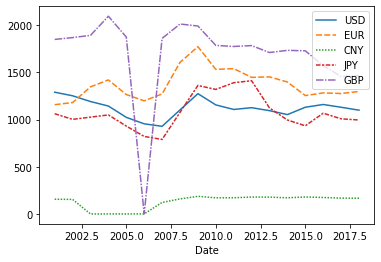

In [221]:
ax = sns.lineplot(data=exchange_mean)
plt.xlabel('Date')

sns.lineplot 기본 디폴트로 정해진 형태로 나옴

하지만 날짜가 하나의 컬럼으로 들어가게 된다면??

In [225]:
exchange_mean= exchange[['USD','EUR','CNY','JPY','GBP']].groupby(exchange['날짜']).mean().reset_index()
exchange_mean=exchange_mean.fillna(0)
exchange_mean

,날짜,USD,EUR,CNY,JPY,GBP
0,2001,1290.952174,1158.577419,155.942208,1062.585613,1850.558246
1,2002,1252.868817,1180.836138,153.808385,1003.021470,1870.015926
2,2003,1191.932530,1347.370255,0.000000,1026.291667,1893.619104
3,2004,1144.197610,1421.162818,0.000000,1049.830947,2096.455400
4,2005,1024.231587,1266.103125,0.000000,931.660556,1876.077143
5,2006,955.512903,1199.308293,0.000000,821.488387,0.000000
6,2007,929.202024,1272.719109,121.757722,789.752915,1861.429198
7,2008,1102.588353,1606.766988,159.046345,1076.633173,2013.854337
8,2009,1275.314786,1774.015547,186.739766,1362.463619,1993.039648
9,2010,1156.194510,1532.937262,170.828333,1320.316510,1787.090238


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


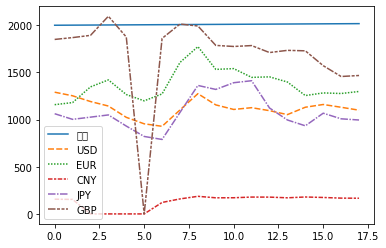

In [231]:
ax = sns.lineplot(data=exchange_mean) #날짜까지 나와버림

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


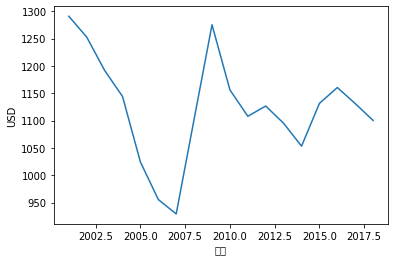

In [232]:
ax = sns.lineplot(y='USD',x='날짜',data=exchange_mean) #복수개 설정은 어떻게 하지??

Text(0, 0.5, 'EXCHANGE')

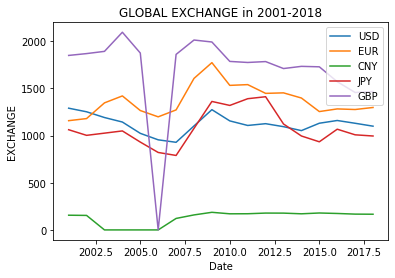

In [201]:
#plt.figure(figsize=(14,6)) #크기 조정
plt.title("GLOBAL EXCHANGE in 2001-2018")
sns.lineplot(x='날짜',y='USD',label='USD',linestyle='dashed',data=exchange_mean) #스타일 지정이 안됨
sns.lineplot(x='날짜',y='EUR',label='EUR',data=exchange_mean)
sns.lineplot(x='날짜',y='CNY',label='CNY',data=exchange_mean)
sns.lineplot(x='날짜',y='JPY',label='JPY',data=exchange_mean)
sns.lineplot(x='날짜',y='GBP',label='GBP',data=exchange_mean)
plt.xlabel("Date")      #x축 이름 설정
plt.ylabel("EXCHANGE")  #y축 이름 설정

여기서는 선 스타일이나 굵기를 조절할 수가 없음

##Long-form dataframe

In [202]:
exchange_mean.head()

,날짜,USD,EUR,CNY,JPY,GBP
0,2001,1290.952174,1158.577419,155.942208,1062.585613,1850.558246
1,2002,1252.868817,1180.836138,153.808385,1003.021470,1870.015926
2,2003,1191.932530,1347.370255,0.000000,1026.291667,1893.619104
3,2004,1144.197610,1421.162818,0.000000,1049.830947,2096.455400
4,2005,1024.231587,1266.103125,0.000000,931.660556,1876.077143


In [203]:
exchange_df = pd.DataFrame(columns=['날짜','nation','exchange'])
exchange_df

,날짜,nation,exchange


In [204]:
a=0
for i in range(0,18):
  for nation in ['USD','EUR','CNY','JPY','GBP']:
    kk = [exchange_mean['날짜'][i],nation,exchange_mean[nation][i]]
    exchange_df.loc[a]=kk
    a+=1

exchange_df

,날짜,nation,exchange
0,2001,USD,1290.952174
1,2001,EUR,1158.577419
2,2001,CNY,155.942208
3,2001,JPY,1062.585613
4,2001,GBP,1850.558246
...,...,...,...
85,2018,USD,1100.208493
86,2018,EUR,1298.530959
87,2018,CNY,166.405699
88,2018,JPY,996.034466


In [205]:
exchange_df['graph_option']=0
exchange_df['graph_option']=[1,2,3,4,5]*18
exchange_df

,날짜,nation,exchange,graph_option
0,2001,USD,1290.952174,1
1,2001,EUR,1158.577419,2
2,2001,CNY,155.942208,3
3,2001,JPY,1062.585613,4
4,2001,GBP,1850.558246,5
...,...,...,...,...
85,2018,USD,1100.208493,1
86,2018,EUR,1298.530959,2
87,2018,CNY,166.405699,3
88,2018,JPY,996.034466,4


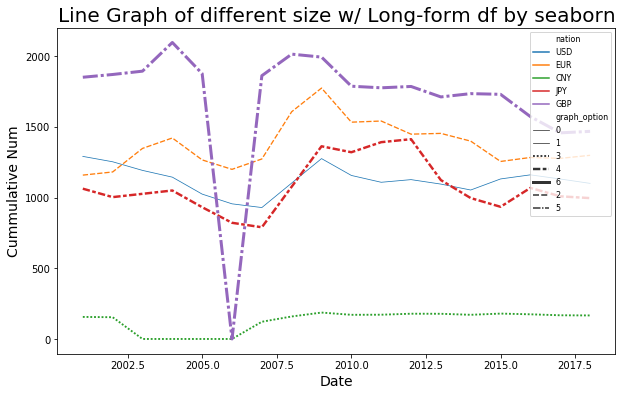

In [206]:
plt.figure(figsize=(10,6))

ax = sns.lineplot(x='날짜', 
                  y='exchange', 
                  hue='nation',
                  size='graph_option',           #선 굵기
                  style='graph_option',          #선 스타일
                  data=exchange_df)

plt.title('Line Graph of different size w/ Long-form df by seaborn', fontsize=20)
plt.ylabel('Cummulative Num', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=8, loc=1)
plt.show()

결론적으로 seaborn의 lineplot은 시간또는 어떠한 흐름에 따라 컬럼들의 변화를 보여주는 그래프인데, 

데이터프레임 형태(Wide,Long)에 따라 만드는 방법이 다르다.

- 데이터 프레임이 WIde 방식일 때는 인덱스를 직접 날짜와 같이 x축으로 받아야할 데이터로 설정하는 것이 좋다.

- 데이터 프레임이 Long frame 형식일 떄는 'hue'라는 파라미터를 활용해서 어떠한 기준으로 선을 만들지 설정할 수있다. 또한 선굵기와 스타일도 적시에 활용할 수 있음.